## Loading Libraries and Data

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [31]:
# Load data
policies = pd.read_csv('policies.csv') 
claims = pd.read_csv('claims.csv')

In [67]:
print(policies.info(), '\n')
print(claims.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Policy_ID        10050 non-null  int64  
 1   Customer_ID      10050 non-null  int64  
 2   Policy_Age       10050 non-null  int64  
 3   Product_Type     10050 non-null  object 
 4   Vehicle_Type     10050 non-null  object 
 5   Driving_History  10050 non-null  int64  
 6   Region           10050 non-null  object 
 7   Exposure         10050 non-null  int64  
 8   Premium          10050 non-null  float64
 9   Earned_Premium   10050 non-null  float64
 10  Ultimate_Losses  10050 non-null  float64
 11  Pure_Premium     10050 non-null  float64
 12  Reserved_Losses  9950 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 1020.8+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 6 columns):
 #   Column        Non-

array([[<AxesSubplot:title={'center':'Policy_ID'}>,
        <AxesSubplot:title={'center':'Customer_ID'}>,
        <AxesSubplot:title={'center':'Policy_Age'}>],
       [<AxesSubplot:title={'center':'Driving_History'}>,
        <AxesSubplot:title={'center':'Exposure'}>,
        <AxesSubplot:title={'center':'Premium'}>],
       [<AxesSubplot:title={'center':'Earned_Premium'}>,
        <AxesSubplot:title={'center':'Ultimate_Losses'}>,
        <AxesSubplot:title={'center':'Pure_Premium'}>],
       [<AxesSubplot:title={'center':'Reserved_Losses'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

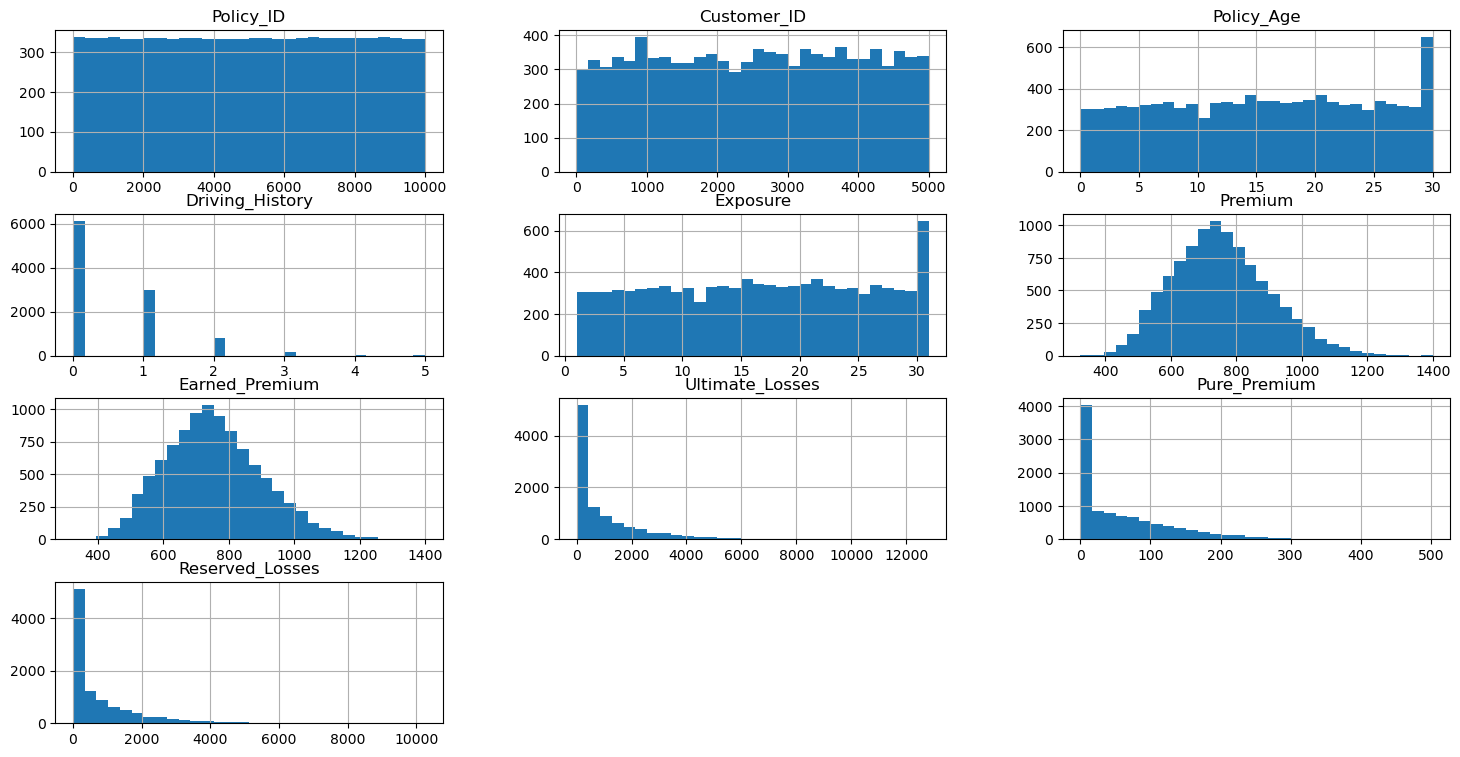

In [68]:
policies.hist(bins=30, figsize=(18, 9))

Pure_Premium       1.000000
Driving_History    0.854348
Ultimate_Losses    0.806537
Reserved_Losses    0.805337
Premium            0.187958
Earned_Premium     0.187958
Policy_ID          0.011150
Customer_ID        0.009368
Policy_Age        -0.020619
Exposure          -0.020619
Name: Pure_Premium, dtype: float64


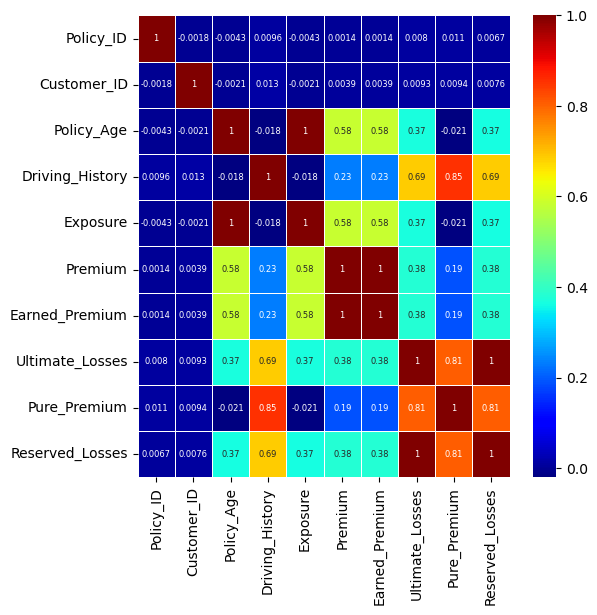

In [73]:
# Creating a correlation plot
correlation_matrix = policies.corr()
print(correlation_matrix['Pure_Premium'].sort_values(ascending=False))

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='jet', 
            linewidths=0.5, 
            annot_kws={'size': 6})

plt.show()


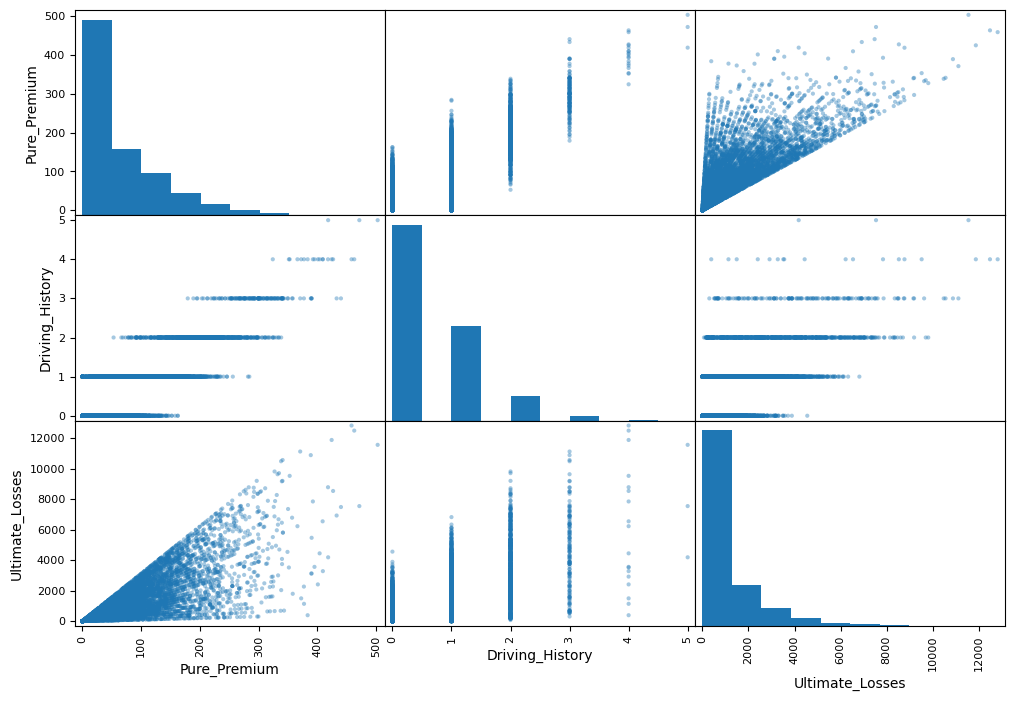

In [76]:
# Focus on the main attribute and assess relationships amongst them
main_attributes = ['Pure_Premium', 'Driving_History', 'Ultimate_Losses']
scatter_matrix(policies[main_attributes], alpha=0.4, figsize=(12, 8))

plt.show()


In [32]:
print(len(policies))
policies.head(3)


10050


,Policy_ID,Customer_ID,Policy_Age,Product_Type,Vehicle_Type,Driving_History,Region,Exposure,Premium,Earned_Premium,Ultimate_Losses,Pure_Premium,Reserved_Losses
0,1,861,1,Liability,Truck,1,West,2,931.31,931.31,161.58,80.790988,129.26
1,2,3773,25,Liability,SUV,1,West,26,983.91,983.91,2446.77,94.106621,1957.42
2,3,3093,20,Home,Car,2,Northeast,21,772.97,772.97,3361.05,160.049829,2688.84


In [33]:
print(len(claims))
claims.head(3)

2956


,Claim_ID,Policy_ID,Claim_Date,Claim_Amount,Claim_Type,Severity
0,1,1,2024-11-19,132.88,Property Damage,132.88
1,2,1,2024-11-12,85.09,Bodily Injury,85.09
2,3,7,2019-04-24,93.94,Property Damage,93.94


## Cleaning Data

In [34]:
# Alterntive 1: Cleaning data NaN
policies_null = policies.isnull().sum() 
claims_null = claims.isnull().sum()
print(policies_null, '\n')
print(claims_null)

Policy_ID            0
Customer_ID          0
Policy_Age           0
Product_Type         0
Vehicle_Type         0
Driving_History      0
Region               0
Exposure             0
Premium              0
Earned_Premium       0
Ultimate_Losses      0
Pure_Premium         0
Reserved_Losses    100
dtype: int64 

Claim_ID         0
Policy_ID        0
Claim_Date       0
Claim_Amount    17
Claim_Type       0
Severity         0
dtype: int64


In [35]:
policies_df = policies.copy()
claims_df = claims.copy()

reserved_losses_median = policies_df['Reserved_Losses'].median()
claim_amount_median = claims_df['Claim_Amount'].median()

policies_df['Reserved_Losses'].fillna(reserved_losses_median, inplace=True)
claims_df['Claim_Amount'].fillna(claim_amount_median, inplace=True)

policies_df_null = policies_df.isnull().sum()
claims_df_null = claims_df.isnull().sum()

print(policies_df_null, '\n')
print(claims_df_null)

Policy_ID          0
Customer_ID        0
Policy_Age         0
Product_Type       0
Vehicle_Type       0
Driving_History    0
Region             0
Exposure           0
Premium            0
Earned_Premium     0
Ultimate_Losses    0
Pure_Premium       0
Reserved_Losses    0
dtype: int64 

Claim_ID        0
Policy_ID       0
Claim_Date      0
Claim_Amount    0
Claim_Type      0
Severity        0
dtype: int64


In [36]:
# Alterntive 2: Dropping NaN dependig on the column
print(len(policies))
print(len(claims))

policies_drop_nan_col_dependent = policies.copy()
claims_drop_nan_col_depdendent = claims.copy()

policies_drop_nan_col_dependent.dropna(subset='Reserved_Losses', inplace=True)
claims_drop_nan_col_depdendent.dropna(subset='Claim_Amount', inplace=True)

print(len(policies_drop_nan_col_dependent))
print(len(claims_drop_nan_col_depdendent))

10050
2956
9950
2939


In [37]:
# Alternative 3: Drop all NaNs
print(len(policies))
print(len(claims))

policies_drop_all_nan = policies.copy()
claims_drop_all_nan = claims.copy()

policies_drop_all_nan.dropna(inplace=True)
claims_drop_all_nan.dropna(inplace=True)

print(len(policies_drop_all_nan))
print(len(claims_drop_all_nan))
print('Policies df Dropped Records:', len(policies) - len(policies_drop_all_nan))
print('Claims df Dropped Records:', len(claims) - len(claims_drop_all_nan))

10050
2956
9950
2939
Policies df Dropped Records: 100
Claims df Dropped Records: 17


**Obs:** Proceeding with Alternative 1: NaN replace with Median of column

In [39]:
# Cleaning duplicates
policies_df_duplicated = sum(policies_df.duplicated())
claims_df_duplicated = sum(claims_df.duplicated())

print(f'Policies Duplicated Records: {policies_df_duplicated}')
print(f'Policies Duplicated Records: {claims_df_duplicated}')

print('\nDf sizes BEFORE dropping duplicates')
print(len(policies_df))
print(len(claims_df))

# Dropping second occurence of duplicated records
policies_final = policies_df.copy()
claims_final = claims_df.copy()

policies_final.drop_duplicates(keep='first', inplace=True)
claims_final.drop_duplicates(keep='first', inplace=True)

print('\nDf sizes AFTER dropping duplicates')
print(len(policies_final))
print(len(claims_final))


Policies Duplicated Records: 50
Policies Duplicated Records: 7

Df sizes BEFORE dropping duplicates
10050
2956

Df sizes AFTER dropping duplicates
10000
2949


## Summarizing Data

In [41]:
# Quick summarization
print(policies_final.describe(), '\n')
print(claims_final.describe())

         Policy_ID   Customer_ID    Policy_Age  Driving_History      Exposure  \
count  10000.00000  10000.000000  10000.000000     10000.000000  10000.000000   
mean    5000.50000   2522.052500     15.148100         0.501000     16.148100   
std     2886.89568   1438.434662      8.846129         0.717949      8.846129   
min        1.00000      2.000000      0.000000         0.000000      1.000000   
25%     2500.75000   1263.000000      7.000000         0.000000      8.000000   
50%     5000.50000   2548.500000     15.000000         0.000000     16.000000   
75%     7500.25000   3763.000000     23.000000         1.000000     24.000000   
max    10000.00000   4999.000000     30.000000         5.000000     31.000000   

            Premium  Earned_Premium  Ultimate_Losses  Pure_Premium  \
count  10000.000000    10000.000000     10000.000000  10000.000000   
mean     754.006230      754.006230       982.477053     61.654003   
std      147.567208      147.567208      1431.221719     73.

In [42]:
policies_final.head(3)

,Policy_ID,Customer_ID,Policy_Age,Product_Type,Vehicle_Type,Driving_History,Region,Exposure,Premium,Earned_Premium,Ultimate_Losses,Pure_Premium,Reserved_Losses
0,1,861,1,Liability,Truck,1,West,2,931.31,931.31,161.58,80.790988,129.26
1,2,3773,25,Liability,SUV,1,West,26,983.91,983.91,2446.77,94.106621,1957.42
2,3,3093,20,Home,Car,2,Northeast,21,772.97,772.97,3361.05,160.049829,2688.84


In [43]:
claims_final.head(3)

,Claim_ID,Policy_ID,Claim_Date,Claim_Amount,Claim_Type,Severity
0,1,1,2024-11-19,132.88,Property Damage,132.88
1,2,1,2024-11-12,85.09,Bodily Injury,85.09
2,3,7,2019-04-24,93.94,Property Damage,93.94


In [ ]:
# 3. Summarize the data by calculating:
# Policies
#   - For each Region and Product Type, calculate:
#       - Avg Policy Age, 
#       - Avg Driving History
#       - Pure Premium min, mean and max
#       - Ultimate Losses min, mean, max

summary_policies = policies_final.groupby(['Region', 'Product_Type']).agg(
    Policy_Age_Avg=pd.NamedAgg(column='Policy_Age', aggfunc='mean'),
    Driving_History_Avg=pd.NamedAgg(column='Driving_History', aggfunc='mean'),
    Pure_Premium_Min=pd.NamedAgg(column='Pure_Premium', aggfunc='min'),
    Pure_Premium_Mean=pd.NamedAgg(column='Pure_Premium', aggfunc='mean'),
    Pure_Premium_Max=pd.NamedAgg(column='Pure_Premium', aggfunc='max'),
    Ultimate_Losses_Min=pd.NamedAgg(column='Ultimate_Losses', aggfunc='min'),
    Ultimate_Losses_Mean=pd.NamedAgg(column='Ultimate_Losses', aggfunc='mean'),
    Ultimate_losses_Max=pd.NamedAgg(column='Ultimate_Losses', aggfunc='max') 
).reset_index()

# Claims
#   - For each Claim Type calculate:
#       - Claim Amount the min, mean and max
#       - Severity min, mean and max

summary_claims = claims_final.groupby('Claim_Type').agg(
    Claim_Amount_Minimum=pd.NamedAgg(column='Claim_Amount', aggfunc='min'),
    Claim_Amount_Mean=pd.NamedAgg(column='Claim_Amount', aggfunc='mean'),
    Claim_Amount_Maximum=pd.NamedAgg(column='Claim_Amount', aggfunc='max'),
    Severity_Minimum=pd.NamedAgg(column='Severity', aggfunc='min'),
    Severity_Mean=pd.NamedAgg(column='Severity', aggfunc='mean'),
    Severity_Maximum=pd.NamedAgg(column='Severity', aggfunc='max')
).reset_index()


In [64]:
summary_policies

,Region,Product_Type,Policy_Age_Avg,Driving_History_Avg,Pure_Premium_Min,Pure_Premium_Mean,Pure_Premium_Max,Ultimate_Losses_Min,Ultimate_Losses_Mean,Ultimate_losses_Max
0,Midwest,Auto,15.089744,0.487179,0.0,61.975117,426.568934,0.0,1012.937436,8531.38
1,Midwest,BOP,15.143763,0.583510,0.0,65.234018,365.900403,0.0,1010.660148,7018.60
2,Midwest,Home,15.166945,0.539232,0.0,65.702003,471.214113,0.0,1056.055092,10880.49
3,Midwest,Liability,15.015152,0.487879,0.0,59.072460,424.108564,0.0,971.152258,11875.04
4,Midwest,Transportation,15.206107,0.603053,0.0,71.899457,400.624847,0.0,1164.220967,9699.37
5,Northeast,Auto,14.494505,0.521978,0.0,67.643892,322.470896,0.0,1003.220000,8708.27
6,Northeast,BOP,15.685259,0.527888,0.0,62.491562,462.573837,0.0,1032.890578,12489.49
7,Northeast,Home,15.426396,0.458545,0.0,58.358187,502.411693,0.0,961.386650,11555.47
8,Northeast,Liability,14.698206,0.502447,0.0,61.509228,432.567470,0.0,960.580816,8776.13
9,Northeast,Transportation,15.177898,0.450135,0.0,54.273441,338.255124,0.0,860.944016,7074.69


In [65]:
summary_claims

,Claim_Type,Claim_Amount_Minimum,Claim_Amount_Mean,Claim_Amount_Maximum,Severity_Minimum,Severity_Mean,Severity_Maximum
0,Bodily Injury,0.0,76.566617,517.42,0.0,76.725383,517.42
1,Collision,0.0,70.378936,461.62,0.0,70.502471,461.62
2,Comprehensive,0.0,69.982000,599.21,0.0,70.126379,599.21
3,Property Damage,0.0,74.051304,638.48,0.0,74.551074,638.48
